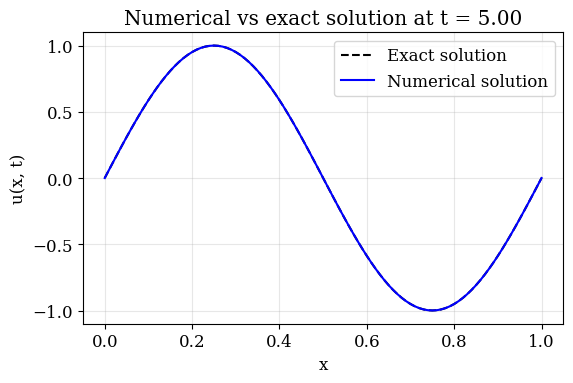

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Varibles
L = 1.0     
c = 1.0    
A0 = 1.0     
k = 2.0 * np.pi  
N = 100     
dx = L / N
lambda_cfl = 0.9
dt = lambda_cfl * dx / c

num_steps = int(T_final / dt)


x = np.linspace(0.0, L, N + 1)

def exact_solution(x, t):
    return A0 * np.sin(k * x) * np.cos(k * c * t)
u0 = A0 * np.sin(k * x)      
g  = np.zeros_like(x)        
u0[0] = 0.0
u0[-1] = 0.0
u_prev = u0.copy()  # u^0

u1 = np.zeros_like(x)
u1[1:-1] = (
    u0[1:-1]
    + dt * g[1:-1]
    + 0.5 * (lambda_cfl**2) * (u0[2:] - 2.0 * u0[1:-1] + u0[:-2])
)
u1[0] = 0.0
u1[-1] = 0.0

u_curr = u1.copy()  # u^1

for n in range(1, num_steps):
    u_next = np.zeros_like(x)
    u_next[1:-1] = (
        2.0 * u_curr[1:-1] - u_prev[1:-1]
        + (lambda_cfl**2) * (u_curr[2:] - 2.0 * u_curr[1:-1] + u_curr[:-2])
    )
    u_next[0] = 0.0
    u_next[-1] = 0.0

    u_prev, u_curr = u_curr, u_next
t_final = num_steps * dt

u_exact_final = exact_solution(x, t_final)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, u_exact_final, 'k--', label='Exact solution')
plt.plot(x, u_curr, 'b-', label='Numerical solution')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title(f'Numerical vs exact solution at t = {t_final:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

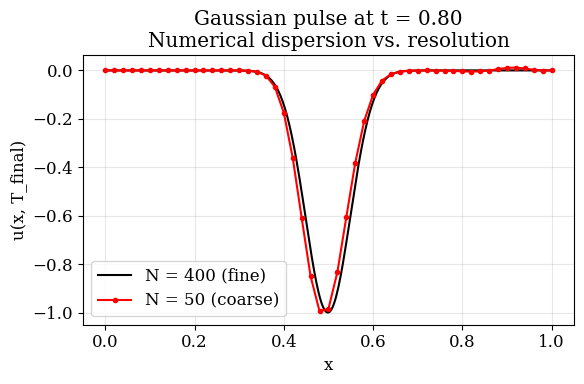

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def run_wave_gaussian(N, L=1.0, c=1.0, lambda_cfl=0.9, T_final=0.8):
    dx = L / N
    dt = lambda_cfl * dx / c
    num_steps = int(T_final / dt)

    x = np.linspace(0.0, L, N + 1)

    x0 = 0.3 * L
    sigma = 0.05 * L
    u0 = np.exp(-((x - x0)**2) / (2.0 * sigma**2))    
    ut0 = - (x - x0) / (sigma**2) * u0 * c                 
    u0[0] = 0.0
    u0[-1] = 0.0
    ut0[0] = 0.0
    ut0[-1] = 0.0

    u_prev = u0.copy()   # u^0

    u1 = np.zeros_like(x)
    u1[1:-1] = (
        u0[1:-1]
        + dt * ut0[1:-1]
        + 0.5 * (lambda_cfl**2) * (u0[2:] - 2.0 * u0[1:-1] + u0[:-2])
    )
    u1[0]  = 0.0
    u1[-1] = 0.0

    u_curr = u1.copy()   # u^1

    for n in range(1, num_steps):
        u_next = np.zeros_like(x)
        u_next[1:-1] = (
            2.0 * u_curr[1:-1] - u_prev[1:-1]
            + (lambda_cfl**2) * (u_curr[2:] - 2.0 * u_curr[1:-1] + u_curr[:-2])
        )
        u_next[0]  = 0.0
        u_next[-1] = 0.0

        u_prev, u_curr = u_curr, u_next

    return x, u_curr

L = 1.0
c = 1.0
lambda_cfl = 0.9
T_final = 0.8  #boundary

x_coarse, u_coarse = run_wave_gaussian(N=50,  L=L, c=c, lambda_cfl=lambda_cfl, T_final=T_final)
x_fine,   u_fine   = run_wave_gaussian(N=400, L=L, c=c, lambda_cfl=lambda_cfl, T_final=T_final)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x_fine,   u_fine,   'k-',  label='N = 400 (fine)')
plt.plot(x_coarse, u_coarse, 'ro-', label='N = 50 (coarse)', markersize=3)
plt.xlabel('x')
plt.ylabel('u(x, T_final)')
plt.title(f'Gaussian pulse at t = {T_final:.2f}\nNumerical dispersion vs. resolution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

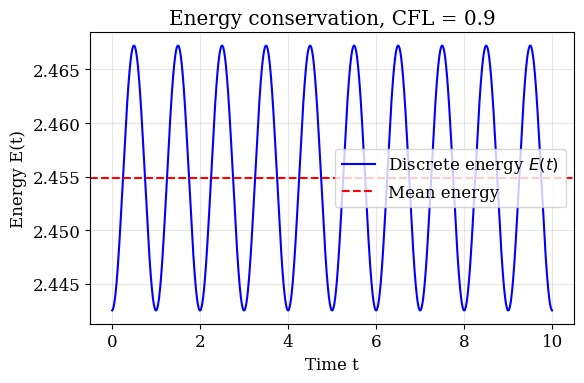

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Varibles
L = 1.0     
c = 1.0       
N = 200   
dx = L / N
lambda_cfl = 0.9
dt = lambda_cfl * dx / c

k_mode = 1
T_period = 2.0 * L / (k_mode * c) 
T_final = 10.0               
num_steps = int(T_final / dt)

x = np.linspace(0.0, L, N + 1)

u0 = np.sin(k_mode * np.pi * x / L)
g  = np.zeros_like(x)

u0[0] = 0.0
u0[-1] = 0.0

u_prev = u0.copy()  # u^0

u1 = np.zeros_like(x)
u1[1:-1] = (
    u0[1:-1]
    + dt * g[1:-1]
    + 0.5 * (lambda_cfl**2) * (u0[2:] - 2.0 * u0[1:-1] + u0[:-2])
)
u1[0] = 0.0
u1[-1] = 0.0

u_curr = u1.copy()  # u^1

def compute_energy(u_prev, u_curr, u_next, dx, dt, c):
    ut = (u_next - u_prev) / (2.0 * dt)

    ux = np.zeros_like(u_curr)
    ux[1:-1] = (u_curr[2:] - u_curr[:-2]) / (2.0 * dx)

    ux[0] = 0.0
    ux[-1] = 0.0

    E = 0.5 * np.sum(ut**2 + (c**2) * ux**2) * dx
    return E

times = []
energies = []

for n in range(1, num_steps):
    u_next = np.zeros_like(x)
    u_next[1:-1] = (
        2.0 * u_curr[1:-1] - u_prev[1:-1]
        + (lambda_cfl**2) * (u_curr[2:] - 2.0 * u_curr[1:-1] + u_curr[:-2])
    )
    u_next[0] = 0.0
    u_next[-1] = 0.0

    t_n = n * dt

    E_n = compute_energy(u_prev, u_curr, u_next, dx, dt, c)
    times.append(t_n)
    energies.append(E_n)
    
    u_prev, u_curr = u_curr, u_next

times = np.array(times)
energies = np.array(energies)
E_mean = np.mean(energies)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(times, energies, 'b-', label='Discrete energy $E(t)$')
plt.axhline(E_mean, color='r', linestyle='--', label='Mean energy')
plt.xlabel('Time t')
plt.ylabel('Energy E(t)')
plt.title(f'Energy conservation, CFL = {lambda_cfl:.1f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


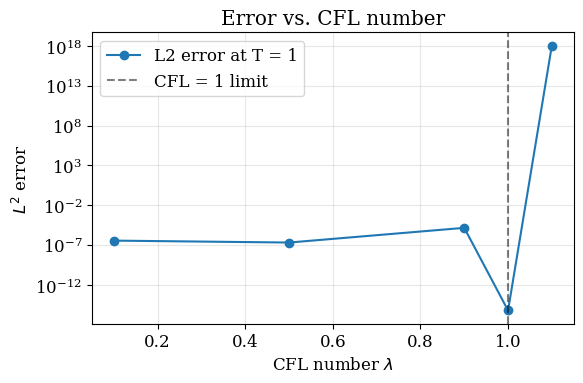

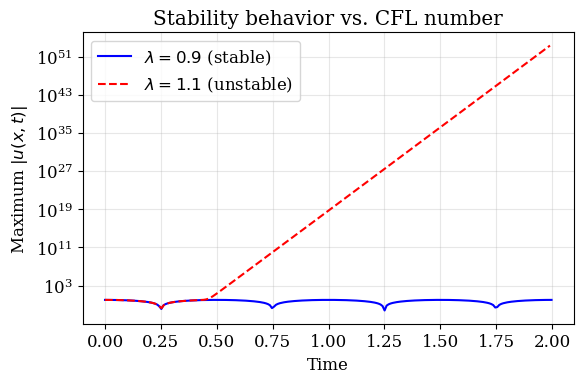

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Varibles
L = 1.0
c = 1.0
A0 = 1.0
k = 2.0 * np.pi       
N = 100         
dx = L / N

x = np.linspace(0.0, L, N + 1)

def exact_solution(x, t):
    return A0 * np.sin(k * x) * np.cos(k * c * t)

def solve_wave_for_cfl(lambda_cfl, T_final):
    dt = lambda_cfl * dx / c
    num_steps = int(T_final / dt)

    u0 = A0 * np.sin(k * x)      # u(x,0)
    g  = np.zeros_like(x)        # ut(x,0) = 0

    u0[0]  = 0.0
    u0[-1] = 0.0

    u_prev = u0.copy()
    u_curr = np.zeros_like(x)

    u_curr[1:-1] = (
        u0[1:-1]
        + dt * g[1:-1]
        + 0.5 * (lambda_cfl**2) * (u0[2:] - 2.0 * u0[1:-1] + u0[:-2])
    )
    u_curr[0]  = 0.0
    u_curr[-1] = 0.0

    max_u_history = [np.max(np.abs(u0)), np.max(np.abs(u_curr))]
    time_history  = [0.0, dt]

    for n in range(1, num_steps):
        u_next = np.zeros_like(x)
        u_next[1:-1] = (
            2.0 * u_curr[1:-1] - u_prev[1:-1]
            + (lambda_cfl**2) * (u_curr[2:] - 2.0 * u_curr[1:-1] + u_curr[:-2])
        )
        u_next[0]  = 0.0
        u_next[-1] = 0.0

        t_n = (n + 1) * dt
        max_u_history.append(np.max(np.abs(u_next)))
        time_history.append(t_n)

        u_prev, u_curr = u_curr, u_next

    return u_curr, np.array(time_history), np.array(max_u_history), dt

cfl_values = [0.1, 0.5, 0.9, 1.0, 1.1]
errors_L2 = []

T_compare = 1.0

for lam in cfl_values:
    T_use = T_compare
    u_num, _, _, dt_used = solve_wave_for_cfl(lam, T_use)

    u_ex = exact_solution(x, T_compare)

    error = np.sqrt(np.sum((u_num - u_ex)**2) * dx)
    errors_L2.append(error)

# Plot 1
plt.figure(figsize=(6, 4))
plt.plot(cfl_values, errors_L2, 'o-', label='L2 error at T = 1')
plt.axvline(1.0, color='k', linestyle='--', alpha=0.5, label='CFL = 1 limit')
plt.xlabel(r'CFL number $\lambda$')
plt.ylabel(r'$L^2$ error')
plt.yscale('log')
plt.title('Error vs. CFL number')
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2
T_stability = 2.0  

u_09, t_09, maxu_09, dt_09 = solve_wave_for_cfl(0.9, T_stability)
u_11, t_11, maxu_11, dt_11 = solve_wave_for_cfl(1.1, T_stability)

plt.figure(figsize=(6, 4))
plt.semilogy(t_09, maxu_09, 'b-', label=r'$\lambda = 0.9$ (stable)')
plt.semilogy(t_11, maxu_11, 'r--', label=r'$\lambda = 1.1$ (unstable)')
plt.xlabel('Time')
plt.ylabel(r'Maximum $|u(x,t)|$')
plt.title('Stability behavior vs. CFL number')
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
